In [43]:
import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [44]:
df = pd.read_csv (r'C:\Users\OLUFUNMILAYO\Downloads\Arrest_Data_from_2010_to_2019.csv')   #read the csv file (put 'r' before the path string to address any special characters, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
df.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,191811472,05/03/2019,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,5614161,04/29/2019,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,5615197,04/30/2019,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
3,5615701,04/30/2019,1100.0,9,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"
4,5615929,04/30/2019,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)"


In [45]:
df.shape

(1310127, 17)

In [46]:
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'])
df.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,191811472,2019-05-03,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,5614161,2019-04-29,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,5615197,2019-04-30,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
3,5615701,2019-04-30,1100.0,9,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"
4,5615929,2019-04-30,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)"


In [67]:
df['year_only'] = df['Arrest Date'].dt.year
df.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,year_only
0,191811472,2019-05-03,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)",2019
1,5614161,2019-04-29,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)",2019
2,5615197,2019-04-30,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)",2019
3,5615701,2019-04-30,1100.0,9,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)",2019
4,5615929,2019-04-30,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)",2019


In [49]:
# select columns 
dftricharge = df[(df['Charge Group Description']=='Against Family/Child') |(df['Charge Group Description']=='Aggravated Assault')|(df['Charge Group Description']=='Burglary')|(df['Charge Group Description']=='Disorderly Conduct')|(df['Charge Group Description']=='Disturbing the Peace')|(df['Charge Group Description']=='Driving Under Influence')|(df['Charge Group Description']=='Drunkeness')|(df['Charge Group Description']=='Federal Offenses')|(df['Charge Group Description']=='Forgery/Counterfeit')|(df['Charge Group Description']=='Fraud/Embezzlement')|(df['Charge Group Description']=='Gambling')|(df['Charge Group Description']=='Homicide')|(df['Charge Group Description']=='Larceny')|(df['Charge Group Description']=='Liquor Laws')|(df['Charge Group Description']=='Miscellaneous Other Violations')|(df['Charge Group Description']=='Moving Traffic Violations')|(df['Charge Group Description']=='Narcotic Drug Laws')|(df['Charge Group Description']=='Other Assaults')|(df['Charge Group Description']=='Prostitution/Allied')|(df['Charge Group Description']=='Rape')|(df['Charge Group Description']=='Receive Stolen Property')|(df['Charge Group Description']=='Robbery')|(df['Charge Group Description']=='Sex (except rape/prst)')|(df['Charge Group Description']=='Vehicle Theft')|(df['Charge Group Description']=='Weapon (carry/poss)')]

In [50]:
dftricharge.shape

(1202802, 18)

In [68]:
dftricharge.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,year_only
1,5614161,2019-04-29,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)",2019
2,5615197,2019-04-30,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)",2019
4,5615929,2019-04-30,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)",2019
5,190112234,2019-04-16,1450.0,1,Central,123,54,F,H,24.0,Miscellaneous Other Violations,M,41.45CLAMC,ILLEGAL POSSESSION OF SHOPPING CART,1ST,SPRING,"(34.053, -118.2444)",2019
6,190112235,2019-04-26,1505.0,1,Central,152,57,M,H,18.0,Drunkeness,M,41.27CLAMC,DRINKING IN PUBLIC,6TH,HILL,"(34.0481, -118.2542)",2019


In [66]:
dftricharge.describe()

,Report ID,Time,Area ID,Reporting District,Age,Charge Group Code,year_only
count,1.202802e+06,1.202667e+06,1.202802e+06,1.202802e+06,1.202802e+06,1.202802e+06,1.202802e+06
mean,3.868827e+07,1.389308e+03,1.019323e+01,1.066279e+03,3.452332e+01,1.593365e+01,2.013876e+03
std,5.925601e+07,6.667484e+02,6.230416e+00,6.216986e+02,1.330470e+01,7.030056e+00,2.754123e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+02,0.000000e+00,1.000000e+00,2.010000e+03
25%,3.381739e+06,9.450000e+02,5.000000e+00,5.170000e+02,2.400000e+01,9.000000e+00,2.012000e+03
50%,4.587024e+06,1.515000e+03,1.000000e+01,1.091000e+03,3.200000e+01,1.700000e+01,2.014000e+03
75%,1.008191e+08,1.930000e+03,1.500000e+01,1.548000e+03,4.500000e+01,2.200000e+01,2.016000e+03
max,9.921099e+08,2.400000e+03,2.100000e+01,2.199000e+03,9.600000e+01,2.500000e+01,2.019000e+03


In [71]:
dftricharge_1 =dftricharge[(dftricharge['year_only']==2018)]

In [70]:
dftricharge_1.head

<bound method NDFrame.head of          Report ID       Age        Charge Group Description  year_only
156        5213460 -0.465183              Fraud/Embezzlement       2018
157        5257944 -0.154251                        Homicide       2018
158        5328813  0.700812              Narcotic Drug Laws       2018
159        5336331 -0.931581             Weapon (carry/poss)       2018
160        5360731 -0.231984             Weapon (carry/poss)       2018
161        5404690  0.312147             Weapon (carry/poss)       2018
162        5406551 -0.309717             Weapon (carry/poss)       2018
165        5419122  1.711341                  Other Assaults       2018
166        5430543 -0.776115  Miscellaneous Other Violations       2018
167        5449454  0.623079                   Vehicle Theft       2018
172        5449463 -0.231984                   Vehicle Theft       2018
173        5452727 -0.698382                   Vehicle Theft       2018
174        5456681  1.011744      

In [74]:
dftricharge_1.drop(['Arrest Date','Time','Area ID','Area Name','Reporting District', 'Sex Code', 'Descent Code', 'Charge Group Code', 'Arrest Type Code', 'Charge', 'Charge Description', 'Address', 'Cross Street',
   'Location'], axis=1, inplace=True)

C:\Users\OLUFUNMILAYO\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


dftrialcharge_1.dropna(subset=["Charge Group Description"], axis=0, inplace=True)


In [75]:
dftricharge_1.shape

(91544, 4)

In [76]:
dftricharge_1.head()

,Report ID,Age,Charge Group Description,year_only
156,5213460,29,Fraud/Embezzlement,2018
157,5257944,33,Homicide,2018
158,5328813,44,Narcotic Drug Laws,2018
159,5336331,23,Weapon (carry/poss),2018
160,5360731,32,Weapon (carry/poss),2018


In [77]:
dftricharge_1['Age'].mean()

34.98436817268199

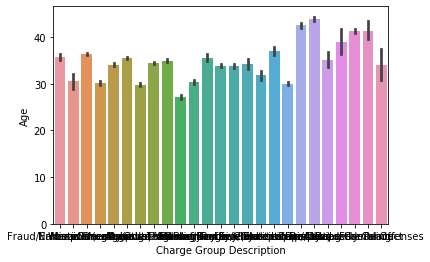

In [78]:
sns.barplot(x='Charge Group Description',y='Age', data = dftricharge_1)

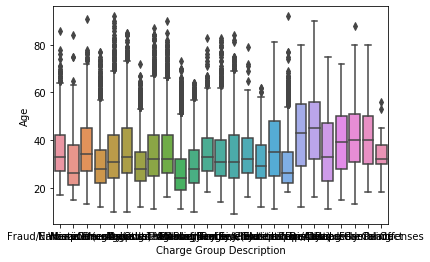

In [59]:
sns.boxplot(x='Charge Group Description',y='Age', data = dftricharge_1)

dftrialcharge_2['Age'] = (dftrialcharge_2['Age'] - dftrialcharge_2['Age'].mean())/dftrialcharge_2['Age'].std()

In [84]:
dftricharge_1.head()

,Report ID,Age,Charge Group Description,year_only
156,5213460,29,Fraud/Embezzlement,2018
157,5257944,33,Homicide,2018
158,5328813,44,Narcotic Drug Laws,2018
159,5336331,23,Weapon (carry/poss),2018
160,5360731,32,Weapon (carry/poss),2018


In [85]:
dftricharge_4 = dftricharge_1.groupby(['Charge Group Description'])['Age'].mean().reset_index()

In [86]:
dftricharge_4.head()

,Charge Group Description,Age
0,Against Family/Child,35.539545
1,Aggravated Assault,34.434622
2,Burglary,30.391216
3,Disorderly Conduct,41.229890
4,Disturbing the Peace,39.010204


In [87]:
dftricharge_4['Age'] = (dftricharge_4['Age'] - dftricharge_4['Age'].mean())/dftricharge_4['Age'].std()

In [88]:
dftricharge_4.head()

,Charge Group Description,Age
0,Against Family/Child,0.151607
1,Aggravated Assault,-0.109420
2,Burglary,-1.064637
3,Disorderly Conduct,1.495897
4,Disturbing the Peace,0.971517


In [89]:
dftricharge_4['Age'].max()

2.1278699344353633

In [80]:
dftricharge_0 = dftricharge_1.groupby(['Charge Group Description']).count().reset_index()

In [81]:
dftricharge_0

,Charge Group Description,Report ID,Age,year_only
0,Against Family/Child,923,923,923
1,Aggravated Assault,9231,9231,9231
2,Burglary,1958,1958,1958
3,Disorderly Conduct,2536,2536,2536
4,Disturbing the Peace,98,98,98
5,Driving Under Influence,8918,8918,8918
6,Drunkeness,3769,3769,3769
7,Federal Offenses,25,25,25
8,Forgery/Counterfeit,415,415,415
9,Fraud/Embezzlement,1061,1061,1061


In [ ]:
dftricharge_3 = dftricharge_1.drop(['Arrest Date','Time','Area ID','Area Name','Reporting District'], axis=1, inplace=True)